In [365]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
# 선형 회귀분석을 하는 경우에는 위 클래스를 사용
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import statsmodels.api as sm


In [366]:
data_row = pd.read_csv('C:/Users/82108/Desktop/jw/프로젝트/상관분석/학습데이터.csv')

In [367]:
data = data_row.copy()
data.head(5)

,Unnamed: 0,Gu,Dong,Population,Pet_Owners,Total_Registrations,hospital,product,beauty,h+p,h+b,p+b,h+p+b
0,0,동대문구,이문동,41423,1344.0,2373.0,2,1,1,3,3,2,4
1,1,동대문구,장안동,71052,2745.0,3584.0,8,9,1,17,9,10,18
2,2,동대문구,전농동,51329,1559.0,1960.0,3,1,2,4,5,3,6
3,3,동대문구,회기동,13653,285.0,335.0,1,1,1,2,2,2,3
4,4,동대문구,답십리동,56138,1873.0,2538.0,6,2,1,8,7,3,9


In [368]:
# 필요없는 열 제거
data = data.drop(['Unnamed: 0','Gu','Dong','product','beauty','p+b'],axis=1)
data.head(1)

,Population,Pet_Owners,Total_Registrations,hospital,h+p,h+b,h+p+b
0,41423,1344.0,2373.0,2,3,3,4


In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Population           62 non-null     int64  
 1   Pet_Owners           62 non-null     float64
 2   Total_Registrations  62 non-null     float64
 3   hospital             62 non-null     int64  
 4   h+p                  62 non-null     int64  
 5   h+b                  62 non-null     int64  
 6   h+p+b                62 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 3.5 KB


In [370]:
# 타입 변경
#data['Pet_Owners'] = data['Pet_Owners'].astype(int)
#data['Total_Registrations'] = data['Total_Registrations'].astype(int)
#data.info()

In [371]:
# 독립변수, 종속변수 분리

# 함수 사용하여 데이터 분리
independent = list(data.columns.difference(['Pet_Owners']))
# 'Pet_Owners'란 이름과 다른 열을 리스트로 뽑음

# 독립변수들
independent = data[independent]

# 독립변수 나누기
independent_registration = independent[['Total_Registrations']]
independent_reg_pop = independent[['Total_Registrations','Population']]
independent_reg_pop_h = independent[['Total_Registrations','Population', 'hospital']]

# 종속변수들
bound = data['Pet_Owners']

# 독립변수 확인
independent.columns

Index(['Population', 'Total_Registrations', 'h+b', 'h+p', 'h+p+b', 'hospital'], dtype='object')

In [372]:
# independent_registration

# 학습데이터(test)와 평가데이터(train) 8:2 비율로 만들기

x1 = independent_registration   # 독립변수 = 총등록수
x2 = independent_reg_pop        # 독립변수 = 총등록수, 인구수
x3 = independent_reg_pop_h      # 독립변수 = 총등록수, 인구수, 병원
y = bound                       # 종속변수 = 소유자수
train_x1, test_x1, train_x2, test_x2, train_x3, test_x3, train_y, test_y = train_test_split(x1, x2, x3, y, test_size =0.2, random_state=42 )



#train_y = np.array(train_y).reshape(-1,1)
#test_y = np.array(test_y).reshape(-1,1)
#train_x1 = train_x1.astype(float)
#test_x1 = test_x1.astype(float)
#train_x2 = train_x2.astype(float)
#test_x2 = test_x2.astype(float)
#train_x3 = train_x3.astype(float)
#test_x3 = test_x3.astype(float)
#train_y = train_y.astype(float)
#test_y = test_y.astype(float)

train_x1 = np.array(train_x1).reshape(-1,1)
test_x1 = np.array(test_x1).reshape(-1,1)
train_x2 = train_x2.astype(float)
test_x2 = test_x2.astype(float)
train_x3 = train_x3.astype(float)
test_x3 = test_x3.astype(float)

train_y = np.array(train_y).reshape(-1,1)
test_y = np.array(test_y).reshape(-1,1)
test_y = pd.DataFrame(test_y)
#train_y = pd.DataFrame(train_y)

print('train_x1.shape = ', train_x1.shape,'test_x1.shape = ', test_x1.shape) 
print('train_x2.shape = ', train_x2.shape,'test_x2.shape = ', test_x2.shape) 
print('train_x3.shape = ', train_x3.shape,'test_x3.shape = ', test_x3.shape) 
print('train_y.shape = ', train_y.shape, 'test_y.shape = ',test_y.shape) 

train_x1.shape =  (49, 1) test_x1.shape =  (13, 1)
train_x2.shape =  (49, 2) test_x2.shape =  (13, 2)
train_x3.shape =  (49, 3) test_x3.shape =  (13, 3)
train_y.shape =  (49, 1) test_y.shape =  (13, 1)


In [373]:
y.shape

(62,)

회귀분석 모델 구축
- x : registration

In [374]:
# 학습 데이터를 활용하여 반려동물 등록 수와 소유자 수 사이의 관계 파악


# 회귀 모델 적합

model = LinearRegression()
# model = LinearRegression(fit_intercept=True)
# fit_intercept인수는 상수항이 있는지 없는 지를 결정하는 인수 (default=true)
# 이 모델은 입력 데이터와 목표 변수 간의 선형 관계를 모델링
# 새로운 데이터에 대한 예측 수행
result1 = model.fit(train_x1, train_y)
# 가중치 값을 추정
# 상수항 결합을 자동으로 해주므로 사용자가 직접 상수항 결합을 할 필요 없음
# >> 모델은 최적의 가중치(계수)와 편향성(상수항)을 추정 
# >> 가중치와 편향을 추정하는 과정에서 잔차 최소화
# 생성된 모델을 입력 데이터(x)와 목표변수(y)에 대해 학습시키는 과정

predict1 = result1.predict(test_x1)
predict1 = pd.DataFrame(predict1)
predict1

,0
0,4954.751405
1,4606.367956
2,1874.795073
3,3961.241967
4,3996.696920
5,1746.848939
6,2282.527030
7,2335.709459
8,7445.847217
9,3580.486605


In [375]:
# 실제 소유자 수와 추정된 소유자 수 비교

accuracy_list = []
for i in range(len(predict1)):
        print(i)
        print(f'실제 소유자 수 : {test_y.iloc[i,0]}')
        print(f'추정된 소유자 수: {predict1.iloc[i,0]:.2f}')
        print(f'예측의 정확도: {100*(1- abs(predict1.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0]):.2f}%')
        accuracy = 100*(1- abs(predict1.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0])
        accuracy_list.append(accuracy)
        
        
        
    
    
print('-'*30)
total_accuracy = sum(accuracy_list)/len(accuracy_list)

print(f'총 정확도: {total_accuracy:.2f}%')

0
실제 소유자 수 : 5007.0
추정된 소유자 수: 4954.75
예측의 정확도: 98.96%
1
실제 소유자 수 : 4551.0
추정된 소유자 수: 4606.37
예측의 정확도: 98.78%
2
실제 소유자 수 : 1344.0
추정된 소유자 수: 1874.80
예측의 정확도: 60.51%
3
실제 소유자 수 : 3929.0
추정된 소유자 수: 3961.24
예측의 정확도: 99.18%
4
실제 소유자 수 : 3871.0
추정된 소유자 수: 3996.70
예측의 정확도: 96.75%
5
실제 소유자 수 : 1709.0
추정된 소유자 수: 1746.85
예측의 정확도: 97.79%
6
실제 소유자 수 : 2152.0
추정된 소유자 수: 2282.53
예측의 정확도: 93.93%
7
실제 소유자 수 : 2268.0
추정된 소유자 수: 2335.71
예측의 정확도: 97.01%
8
실제 소유자 수 : 7477.0
추정된 소유자 수: 7445.85
예측의 정확도: 99.58%
9
실제 소유자 수 : 4074.0
추정된 소유자 수: 3580.49
예측의 정확도: 87.89%
10
실제 소유자 수 : 2518.0
추정된 소유자 수: 2486.01
예측의 정확도: 98.73%
11
실제 소유자 수 : 2039.0
추정된 소유자 수: 2051.30
예측의 정확도: 99.40%
12
실제 소유자 수 : 4212.0
추정된 소유자 수: 4133.12
예측의 정확도: 98.13%
------------------------------
총 정확도: 94.36%


회귀분석 모델 구축
- x : registration + population

In [376]:
# 학습 데이터를 활용하여 반려동물 등록 수와 소유자 수 사이의 관계 파악


# 회귀 모델 적합

model = LinearRegression()

result2 = model.fit(train_x2, train_y)

predict2 = result2.predict(test_x2)
predict2 = pd.DataFrame(predict2)

# 실제 소유자 수와 추정된 소유자 수 비교

accuracy_list = []
for i in range(len(predict2)):
        print(i)
        print(f'실제 소유자 수 : {test_y.iloc[i,0]}')
        print(f'추정된 소유자 수: {predict2.iloc[i,0]:.2f}')
        print(f'예측의 정확도: {100*(1- abs(predict2.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0]):.2f}%')
        accuracy = 100*(1- abs(predict2.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0])
        accuracy_list.append(accuracy)
    
print('-'*30)
total_accuracy = sum(accuracy_list)/len(accuracy_list)

print(f'총 정확도: {total_accuracy:.2f}%')

0
실제 소유자 수 : 5007.0
추정된 소유자 수: 4945.85
예측의 정확도: 98.78%
1
실제 소유자 수 : 4551.0
추정된 소유자 수: 4599.18
예측의 정확도: 98.94%
2
실제 소유자 수 : 1344.0
추정된 소유자 수: 1866.30
예측의 정확도: 61.14%
3
실제 소유자 수 : 3929.0
추정된 소유자 수: 3949.68
예측의 정확도: 99.47%
4
실제 소유자 수 : 3871.0
추정된 소유자 수: 4009.25
예측의 정확도: 96.43%
5
실제 소유자 수 : 1709.0
추정된 소유자 수: 1754.62
예측의 정확도: 97.33%
6
실제 소유자 수 : 2152.0
추정된 소유자 수: 2267.19
예측의 정확도: 94.65%
7
실제 소유자 수 : 2268.0
추정된 소유자 수: 2344.09
예측의 정확도: 96.65%
8
실제 소유자 수 : 7477.0
추정된 소유자 수: 7515.31
예측의 정확도: 99.49%
9
실제 소유자 수 : 4074.0
추정된 소유자 수: 3575.48
예측의 정확도: 87.76%
10
실제 소유자 수 : 2518.0
추정된 소유자 수: 2448.76
예측의 정확도: 97.25%
11
실제 소유자 수 : 2039.0
추정된 소유자 수: 2047.54
예측의 정확도: 99.58%
12
실제 소유자 수 : 4212.0
추정된 소유자 수: 4138.51
예측의 정확도: 98.26%
------------------------------
총 정확도: 94.29%


회귀분석 모델 구축
- x : registration + population + hospital

In [377]:
# 학습 데이터를 활용하여 독립변수(반려동물 등록 수와 소유자 수, 병원 수)와 종속변수 사이의 관계 파악


# 회귀 모델 적합

model = LinearRegression()

result3 = model.fit(train_x3, train_y)

predict3 = result3.predict(test_x3)
predict3 = pd.DataFrame(predict3)

# 실제 소유자 수와 추정된 소유자 수 비교

accuracy_list = []
for i in range(len(predict3)):
        print(i)
        print(f'실제 소유자 수 : {test_y.iloc[i,0]}')
        print(f'추정된 소유자 수: {predict3.iloc[i,0]:.2f}')
        print(f'예측의 정확도: {100*(1- abs(predict3.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0]):.2f}%')
        accuracy = 100*(1- abs(predict3.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0])
        accuracy_list.append(accuracy)
    
print('-'*30)
total_accuracy = sum(accuracy_list)/len(accuracy_list)

print(f'총 정확도: {total_accuracy:.2f}%')

0
실제 소유자 수 : 5007.0
추정된 소유자 수: 4852.45
예측의 정확도: 96.91%
1
실제 소유자 수 : 4551.0
추정된 소유자 수: 4614.46
예측의 정확도: 98.61%
2
실제 소유자 수 : 1344.0
추정된 소유자 수: 1760.51
예측의 정확도: 69.01%
3
실제 소유자 수 : 3929.0
추정된 소유자 수: 3899.93
예측의 정확도: 99.26%
4
실제 소유자 수 : 3871.0
추정된 소유자 수: 4003.08
예측의 정확도: 96.59%
5
실제 소유자 수 : 1709.0
추정된 소유자 수: 1786.86
예측의 정확도: 95.44%
6
실제 소유자 수 : 2152.0
추정된 소유자 수: 2352.81
예측의 정확도: 90.67%
7
실제 소유자 수 : 2268.0
추정된 소유자 수: 2472.25
예측의 정확도: 90.99%
8
실제 소유자 수 : 7477.0
추정된 소유자 수: 7600.62
예측의 정확도: 98.35%
9
실제 소유자 수 : 4074.0
추정된 소유자 수: 3577.64
예측의 정확도: 87.82%
10
실제 소유자 수 : 2518.0
추정된 소유자 수: 2389.47
예측의 정확도: 94.90%
11
실제 소유자 수 : 2039.0
추정된 소유자 수: 1967.17
예측의 정확도: 96.48%
12
실제 소유자 수 : 4212.0
추정된 소유자 수: 4244.15
예측의 정확도: 99.24%
------------------------------
총 정확도: 93.40%


반려동물 소유자 수 예측 모델

유의성 검정
- 모델이 데이터를 잘 설명하는지 여부
- 검정통계량을 사용하여 모델의 설명력을 통계적으로 판단
- statsmodels의 OLS 명령으로 선형회귀

In [378]:
# 수동으로 상수항 추가
train_x1 = sm.add_constant(train_x1)
# y = a*x + b
# 이때 b는 상수항
# sm.add_constant(x)을 사용하면 상수항이 있는 회귀 모델을 적합할 수 있음


model1 = sm.OLS(train_y, train_x1).fit()
# 유의성 검정을 위해 최소 자승법을 사용하는 함수인 sm.OLS() 사용
# ols 회귀 모델은 주어진 데이터에 가장 적합한 선형회귀식을 추정
# 이때 sm.OLS()는 ols(최소자승법)을 사용하여 선형회귀에 적합
# 이는 독립변수 x와 종속변수 y 간의 선형관계를 나타내는 모델 구축

# F-검정
f_statistic = model1.fvalue  # 검정통계량
# 검정통계량이 클수록 회귀모델이 유의
p_value = model1.f_pvalue

# 결과 출력
print("F-statistic:", f_statistic)
print(f'p-value: {p_value:.2f}')

'''
유의수준을 0.05라 할 때(95% 신뢰수준)
- 귀무가설: 회귀모형이 유의하지 않다.
- 대립가설: 회귀모형이 유의하다.

회귀모형의 유의성 검정은 검정통계량 F값이 48933이고,
유의확률 p값이 0으로 유의수준0.05보다 작으므로
귀무가설을 기각하고, 대립가설을 채택한다.
즉, 회귀 모델은 통계적으로 유의함.

'''

F-statistic: 5212.493297294063
p-value: 0.00


'\n유의수준을 0.05라 할 때(95% 신뢰수준)\n- 귀무가설: 회귀모형이 유의하지 않다.\n- 대립가설: 회귀모형이 유의하다.\n\n회귀모형의 유의성 검정은 검정통계량 F값이 48933이고,\n유의확률 p값이 0으로 유의수준0.05보다 작으므로\n귀무가설을 기각하고, 대립가설을 채택한다.\n즉, 회귀 모델은 통계적으로 유의함.\n\n'

교차 검정
- 주어진 데이터를 여러 번 반복해서 나누어 평가
- 종속변수의 값을 알아내고, 그 종속 변수 값을 얼마나 잘 예측하는 가를 

k-폴드 교차 검정
- 데이터의 수가 적은 경우에 학습과 검증을 반복하는 k폴드 교차 검정

In [379]:
# 데이터 준비
x = x1  # 독립 변수
y = y # 종속 변수

# 모델 정의
model = LinearRegression()

# 교차 검증 수행
kfold = KFold(n_splits=5, shuffle=True, random_state=42)    # KFold 클래스 교차 검증
# 데이터를 5개의 Fold로 나누고 5-fold 교차 검증 수행,
# shuffle=True 무작위로 섞어서 분할
scores = cross_val_score(model, x, y, cv=kfold, scoring='r2')  # , R-squared로 평가
# cross_val_score함수를 사용하여 모델을 평가
# scoring='r2' : 평가 지표로 R-squared를 사용, 각 fold에서 모델의 R-squared계산
# rsquared(수정된 결정계수) = 1 - rss(잔차제곱합) / tss(총제곱합)


# fold의 성능 출력
for i in range(len(scores)):
    print(f'{i+1}번 fold의 R-squared: {scores[i]:.4f}')


print("평균 R-squared:", round(np.mean(scores),4))
#>> 매우 높은 설명력을 가짐

'''
# 동작, 동대문,  종로
각 fold의 R-squared: [0.98752059 0.99855989 0.99737419 0.9946932  0.995287  ]
평균 R-squared: 0.9946869742565878
# 각 fold의 R-squared 값은 fold에서 회귀모델이 종속변수의 변동을 얼마나 잘 설명하는지를 나타내는 지표
# 0에서 1 사이의 값을 가짐. 1에 가까울수록 모델이 데이터를 잘 설몀

## 동대문,동작,종로,광진구,금천구
각 fold의 R-squared: [0.98329415 0.99175426 0.98825034 0.99955781 0.99616499]
평균 R-squared: 0.9918043104102539
'''

# 각 fold의 R-squared 값은 해당 fold에서 모델의 설명력을 나타냄
# R-squared 는 회귀 모델이 종속변수의 변동을 얼마나 잘 설명하는지를 나타내는 지표
# 평균 R-squared은 해당 모델이 전체 데이터에서 얼마나 잘 설명하는 지 평균적인 정확도

# 결정계수는 독립변수의 수가 증가함에 따라 증가하므로,
# 독립변수를 추가할 때마다 결정계수가 증가한다는 단점을 가짐
# 수정된 결정계수는 이를 보완한 것으로 불필요한 독립변수가 추가되는 경우, 
# 수정된 결정계수는 증가하지 않고 감소할 수 있다.

1번 fold의 R-squared: 0.9833
2번 fold의 R-squared: 0.9989
3번 fold의 R-squared: 0.9836
4번 fold의 R-squared: 0.9964
5번 fold의 R-squared: 0.9726
평균 R-squared: 0.9869


'\n# 동작, 동대문,  종로\n각 fold의 R-squared: [0.98752059 0.99855989 0.99737419 0.9946932  0.995287  ]\n평균 R-squared: 0.9946869742565878\n# 각 fold의 R-squared 값은 fold에서 회귀모델이 종속변수의 변동을 얼마나 잘 설명하는지를 나타내는 지표\n# 0에서 1 사이의 값을 가짐. 1에 가까울수록 모델이 데이터를 잘 설몀\n\n## 동대문,동작,종로,광진구,금천구\n각 fold의 R-squared: [0.98329415 0.99175426 0.98825034 0.99955781 0.99616499]\n평균 R-squared: 0.9918043104102539\n'

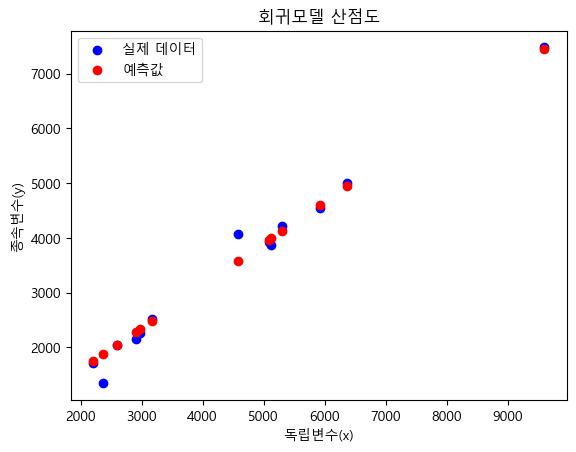

In [381]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 한글 폰트 경로 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.scatter(test_x1, test_y, color='blue', label='실제 데이터')
plt.scatter(test_x1, predict1, color='red', label='예측값')
plt.xlabel('독립변수(x)')
plt.ylabel('종속변수(y)')
plt.title('회귀모델 산점도')
plt.legend()
plt.show()